## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('drive/MyDrive/cdtb/Parkinson_Data_Combined.csv')
# load 'train_data.csv'
data

,Unnamed: 0,PATNO,RECRUITMENT_CAT,NUPSOURC_x,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,NUPSOURC_y,NP1SLPN,NP1SLPD,NP1PAIN,NP1URIN,NP1CNST,NP1LTHD,NP1FATG,NUPSOURC,NP2SPCH,NP2SALV,NP2SWAL,NP2EAT,NP2DRES,NP2HYGN,NP2HWRT,NP2HOBB,NP2TURN,NP2TRMR,NP2RISE,NP2WALK,NP2FREZ,EVENT_ID,ESS1,ESS2,ESS3,ESS4,ESS5,ESS6,ESS7,ESS8,DRMVIVID,DRMAGRAC,DRMNOCTB,SLPLMBMV,SLPINJUR,DRMVERBL,DRMFIGHT,DRMUMV,DRMOBJFL,MVAWAKEN,DRMREMEM,SLPDSTRB,STROKE,HETRA,PARKISM,RLS,NARCLPSY,DEPRS,EPILEPSY,BRNINFM
0,0,10874,PRODROMA,1,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BL,1,0.0,0,0,1.0,0,0,0.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,1,12224,PRODROMA,1,0,0,0,1.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BL,1,1.0,2,1,1.0,0,0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0,0.0,0,1.0,0,0.0,0.0,1.0,0.0,0.0
2,2,12499,PRODROMA,1,0,0,0,0.0,0.0,0.0,1,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,BL,2,2.0,1,1,2.0,0,1,0.0,0,0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,1.0,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0
3,3,12593,PRODROMA,1,1,1,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BL,3,3.0,0,1,3.0,0,0,0.0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,4,13039,PRODROMA,1,0,0,0,0.0,0.0,0.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,BL,0,1.0,0,0,1.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1456,90456,PRODROMA,1,1,0,0,1.0,0.0,0.0,1,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,BL,3,0.0,0,1,0.0,0,0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1457,1457,91097,PRODROMA,1,0,0,0,0.0,0.0,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,BL,1,1.0,0,1,3.0,0,3,0.0,0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1,0.0,0.0,1,0.0,0,0.0,0.0,1.0,0.0,0.0
1458,1458,91837,PRODROMA,1,0,0,0,0.0,0.0,0.0,1,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,BL,1,1.0,0,1,2.0,0,0,0.0,1,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1459,1459,92490,PRODROMA,1,1,0,0,0.0,2.0,0.0,1,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,BL,1,1.0,1,0,3.0,0,1,0.0,1,1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0


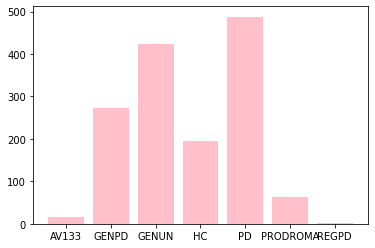

In [2]:
class_x = data['RECRUITMENT_CAT'].value_counts().sort_index().index
class_Freq = data['RECRUITMENT_CAT'].value_counts().sort_index().values

plt.bar(class_x, class_Freq, color="pink")
plt.xticks(class_x)
plt.show()

## Label Preprocessing
#### 1 = HC (Healthy Condition)
#### 2 = PRODROMA
#### 3 = PD (Parkinson's Disease)
#### 4 = GENUN
#### 5 = GENPD

In [3]:
data = data.drop(['Unnamed: 0', 'PATNO', 'EVENT_ID'],axis = 1)
data = data[data['RECRUITMENT_CAT'].isin(['PD', 'HC', 'PRODROMA', 'GENUN', 'GENPD'])]
data = data.replace({'RECRUITMENT_CAT': 'HC'}, {'RECRUITMENT_CAT': 1})
data = data.replace({'RECRUITMENT_CAT': 'PRODROMA'}, {'RECRUITMENT_CAT': 2})
data = data.replace({'RECRUITMENT_CAT': 'PD'}, {'RECRUITMENT_CAT': 3})
data = data.replace({'RECRUITMENT_CAT': 'GENUN'}, {'RECRUITMENT_CAT': 4})
data = data.replace({'RECRUITMENT_CAT': 'GENPD'}, {'RECRUITMENT_CAT': 5})
data = data.astype({'RECRUITMENT_CAT':'float'})
data

,RECRUITMENT_CAT,NUPSOURC_x,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,NUPSOURC_y,NP1SLPN,NP1SLPD,NP1PAIN,NP1URIN,NP1CNST,NP1LTHD,NP1FATG,NUPSOURC,NP2SPCH,NP2SALV,NP2SWAL,NP2EAT,NP2DRES,NP2HYGN,NP2HWRT,NP2HOBB,NP2TURN,NP2TRMR,NP2RISE,NP2WALK,NP2FREZ,ESS1,ESS2,ESS3,ESS4,ESS5,ESS6,ESS7,ESS8,DRMVIVID,DRMAGRAC,DRMNOCTB,SLPLMBMV,SLPINJUR,DRMVERBL,DRMFIGHT,DRMUMV,DRMOBJFL,MVAWAKEN,DRMREMEM,SLPDSTRB,STROKE,HETRA,PARKISM,RLS,NARCLPSY,DEPRS,EPILEPSY,BRNINFM
0,2.0,1,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0,0,1.0,0,0,0.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,2.0,1,0,0,0,1.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,2,1,1.0,0,0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0,0.0,0,1.0,0,0.0,0.0,1.0,0.0,0.0
2,2.0,1,0,0,0,0.0,0.0,0.0,1,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2.0,1,1,2.0,0,1,0.0,0,0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,1.0,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0
3,2.0,1,1,1,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3.0,0,1,3.0,0,0,0.0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,2.0,1,0,0,0,0.0,0.0,0.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0,0,1.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2.0,1,1,0,0,1.0,0.0,0.0,1,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,3,0.0,0,1,0.0,0,0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1457,2.0,1,0,0,0,0.0,0.0,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1.0,0,1,3.0,0,3,0.0,0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1,0.0,0.0,1,0.0,0,0.0,0.0,1.0,0.0,0.0
1458,2.0,1,0,0,0,0.0,0.0,0.0,1,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1.0,0,1,2.0,0,0,0.0,1,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1459,2.0,1,1,0,0,0.0,2.0,0.0,1,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1.0,1,0,3.0,0,1,0.0,1,1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0


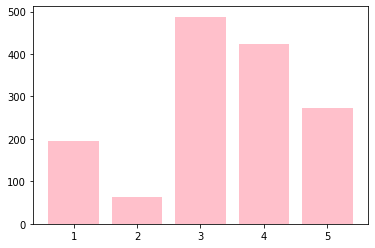

In [4]:
class_x = data['RECRUITMENT_CAT'].value_counts().sort_index().index
class_Freq = data['RECRUITMENT_CAT'].value_counts().sort_index().values

plt.bar(class_x, class_Freq, color="pink")
plt.xticks(class_x)
plt.show()

In [5]:
from sklearn.utils import resample
data_pre1 = data[data["RECRUITMENT_CAT"]==1]
data_pre2 = data[data["RECRUITMENT_CAT"]==2]
data_pre3 = data[data["RECRUITMENT_CAT"]==3]
data_pre4 = data[data["RECRUITMENT_CAT"]==4]
data_pre5 = data[data["RECRUITMENT_CAT"]==5]
data_pre1_u = resample(data_pre1, n_samples=488, replace=True, random_state=0)
data_pre2_u = resample(data_pre2, n_samples=488, replace=True, random_state=0)
data_pre4_u = resample(data_pre4, n_samples=488, replace=True, random_state=0)
data_pre5_u = resample(data_pre5, n_samples=488, replace=True, random_state=0)
data = pd.concat([data_pre1_u, data_pre2_u, data_pre3, data_pre4_u, data_pre5_u], axis=0)
data['RECRUITMENT_CAT'].value_counts()

5.0    488
4.0    488
3.0    488
2.0    488
1.0    488
Name: RECRUITMENT_CAT, dtype: int64

In [6]:
from pycaret.classification import *
exp1 = setup(data, target = 'RECRUITMENT_CAT')

,Description,Value
0,session_id,5836
1,Target,RECRUITMENT_CAT
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(2440, 58)"
5,Missing Values,False
6,Numeric Features,25
7,Categorical Features,32
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
compare_models()
# Cross validation -> 10

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8577,0.9794,0.8584,0.8588,0.8563,0.8221,0.8230,0.560
et,Extra Trees Classifier,0.8577,0.9806,0.8578,0.8633,0.8564,0.8220,0.8239,0.548
lightgbm,Light Gradient Boosting Machine,0.8506,0.9753,0.8515,0.8526,0.8493,0.8133,0.8145,0.350
xgboost,Extreme Gradient Boosting,0.8483,0.9727,0.8493,0.8504,0.8467,0.8103,0.8116,6.184
catboost,CatBoost Classifier,0.8477,0.9766,0.8486,0.8490,0.8461,0.8097,0.8107,7.391
dt,Decision Tree Classifier,0.8155,0.8847,0.8169,0.8183,0.8121,0.7694,0.7716,0.028
gbc,Gradient Boosting Classifier,0.7774,0.9517,0.7782,0.7810,0.7759,0.7218,0.7233,1.495
lr,Logistic Regression,0.6438,0.9068,0.6443,0.6489,0.6434,0.5547,0.5562,0.679
ridge,Ridge Classifier,0.6180,0.0000,0.6173,0.6338,0.6205,0.5222,0.5246,0.016
lda,Linear Discriminant Analysis,0.6169,0.8947,0.6165,0.6435,0.6225,0.5208,0.5244,0.037


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5836, verbose=0,
                       warm_start=False)

In [8]:
gbc = create_model('gbc')
gbc

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.9551,0.7776,0.7804,0.7766,0.7221,0.7234
1,0.8129,0.9548,0.8135,0.8122,0.8110,0.7661,0.7669
2,0.7778,0.9436,0.7777,0.7796,0.7779,0.7222,0.7225
3,0.7953,0.9646,0.7957,0.7944,0.7923,0.7441,0.7453
4,0.7602,0.9407,0.7601,0.7672,0.7586,0.7001,0.7022
5,0.7602,0.9495,0.7614,0.7580,0.7571,0.7003,0.7013
6,0.7427,0.9383,0.7450,0.7494,0.7413,0.6786,0.6810
7,0.7882,0.9516,0.7884,0.7914,0.7895,0.7353,0.7354
8,0.7824,0.9556,0.7830,0.7966,0.7797,0.7279,0.7326
9,0.7765,0.9631,0.7791,0.7811,0.7748,0.7208,0.7227


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5836, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [9]:
rf = create_model('rf')
rf

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8480,0.9760,0.8480,0.8531,0.8459,0.8099,0.8119
1,0.8947,0.9900,0.8956,0.8954,0.8938,0.8684,0.8691
2,0.8304,0.9716,0.8317,0.8298,0.8296,0.7880,0.7883
3,0.8713,0.9849,0.8721,0.8707,0.8697,0.8392,0.8398
4,0.8363,0.9729,0.8357,0.8412,0.8345,0.7952,0.7971
5,0.8421,0.9777,0.8441,0.8391,0.8383,0.8027,0.8038
6,0.8070,0.9708,0.8080,0.8112,0.8063,0.7588,0.7601
7,0.8471,0.9785,0.8480,0.8454,0.8456,0.8088,0.8091
8,0.9000,0.9828,0.8997,0.9036,0.9001,0.8749,0.8758
9,0.9000,0.9892,0.9013,0.8989,0.8989,0.8750,0.8753


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5836, verbose=0,
                       warm_start=False)

In [10]:
cat = create_model('catboost')
cat

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7953,0.9696,0.7961,0.7925,0.7931,0.7441,0.7445
1,0.8830,0.9822,0.8842,0.8841,0.8814,0.8538,0.8550
2,0.8304,0.9656,0.8314,0.8309,0.8296,0.7881,0.7886
3,0.8830,0.9871,0.8838,0.8840,0.8822,0.8538,0.8544
4,0.8304,0.9689,0.8300,0.8365,0.8290,0.7879,0.7899
5,0.8538,0.9800,0.8553,0.8561,0.8517,0.8173,0.8189
6,0.8070,0.9650,0.8092,0.8089,0.8056,0.7589,0.7600
7,0.8706,0.9779,0.8712,0.8707,0.8698,0.8382,0.8386
8,0.8412,0.9803,0.8426,0.8444,0.8367,0.8015,0.8043
9,0.8824,0.9895,0.8827,0.8823,0.8813,0.8529,0.8534


In [11]:
X = data.drop('RECRUITMENT_CAT',axis=1)
y = data['RECRUITMENT_CAT']
# y.value_counts()
X

,NUPSOURC_x,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,NUPSOURC_y,NP1SLPN,NP1SLPD,NP1PAIN,NP1URIN,NP1CNST,NP1LTHD,NP1FATG,NUPSOURC,NP2SPCH,NP2SALV,NP2SWAL,NP2EAT,NP2DRES,NP2HYGN,NP2HWRT,NP2HOBB,NP2TURN,NP2TRMR,NP2RISE,NP2WALK,NP2FREZ,ESS1,ESS2,ESS3,ESS4,ESS5,ESS6,ESS7,ESS8,DRMVIVID,DRMAGRAC,DRMNOCTB,SLPLMBMV,SLPINJUR,DRMVERBL,DRMFIGHT,DRMUMV,DRMOBJFL,MVAWAKEN,DRMREMEM,SLPDSTRB,STROKE,HETRA,PARKISM,RLS,NARCLPSY,DEPRS,EPILEPSY,BRNINFM
585,1,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0,0,1.0,0,1,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
162,1,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1,1,2.0,0,0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
394,1,0,0,0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0,1,1.0,0,0,0.0,1,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
782,1,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0,0,0.0,0,0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
236,1,0,0,0,0.0,0.0,0.0,1,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,1,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0,0,1,1.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,1,0.0,0.0,0.0,0.0,0.0
737,3,0,0,1,2.0,1.0,1.0,3,0.0,1.0,0.0,0.0,0.0,1.0,2.0,3,0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,1.0,0.0,0.0,2,2.0,0,0,3.0,0,1,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,1.0,0,0.0,1,0.0,0.0,1.0,0.0,0.0
866,1,0,0,1,0.0,0.0,0.0,1,2.0,0.0,3.0,2.0,3.0,1.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0,1,2.0,0,0,0.0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,1,0.0,0.0,0.0,1.0,0.0
753,1,0,0,1,0.0,0.0,0.0,1,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1,1,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0,1,0.0,0,0,0.0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0,0.0,1,0.0,0.0,1.0,0.0,0.0


## Random Forest
Train_Test_split = 10-fold Cross validation
hyperparameter = GridSearchCV


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
task1_RF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=57,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8520, verbose=0,
                       warm_start=False)
task1_RF.fit(X,y)
scores = cross_val_score(task1_RF, X, y, cv=10)
scores.mean(), scores

(0.8692622950819672,
 array([0.91803279, 0.8852459 , 0.83606557, 0.84016393, 0.8852459 ,
        0.88114754, 0.8442623 , 0.86885246, 0.85245902, 0.88114754]))

## Random Forest Confusion Matrix
(train_test split 한 후에, test 값을 x,y로 넣어주어야 함)

In [13]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(task1_RF, X, y, cv=10)

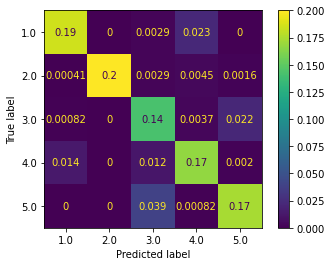

In [14]:
from sklearn.metrics import plot_confusion_matrix
conf_mat = plot_confusion_matrix(task1_RF, X, y_pred, normalize='all')

## CatBoost

In [15]:
from catboost import CatBoostClassifier
task1_Cat = CatBoostClassifier(iterations=10,
                           learning_rate=0.03,
                           loss_function='MultiClass')
task1_Cat.fit(X,y)
scores = cross_val_score(task1_Cat, X, y, cv=10)
scores.mean(), scores

0:	learn: 1.5784615	total: 8.53ms	remaining: 76.8ms
1:	learn: 1.5480654	total: 17.7ms	remaining: 70.9ms
2:	learn: 1.5188637	total: 24.8ms	remaining: 57.9ms
3:	learn: 1.4901971	total: 31.9ms	remaining: 47.9ms
4:	learn: 1.4650206	total: 38.8ms	remaining: 38.8ms
5:	learn: 1.4407534	total: 45.7ms	remaining: 30.4ms
6:	learn: 1.4196873	total: 52.5ms	remaining: 22.5ms
7:	learn: 1.3995626	total: 59.3ms	remaining: 14.8ms
8:	learn: 1.3787428	total: 66.8ms	remaining: 7.42ms
9:	learn: 1.3599857	total: 73.4ms	remaining: 0us
0:	learn: 1.5783327	total: 6.9ms	remaining: 62.1ms
1:	learn: 1.5479915	total: 13.7ms	remaining: 54.7ms
2:	learn: 1.5200768	total: 20.7ms	remaining: 48.2ms
3:	learn: 1.4937253	total: 27.7ms	remaining: 41.6ms
4:	learn: 1.4680695	total: 34.5ms	remaining: 34.5ms
5:	learn: 1.4445563	total: 41.4ms	remaining: 27.6ms
6:	learn: 1.4255817	total: 48.1ms	remaining: 20.6ms
7:	learn: 1.4058547	total: 54.8ms	remaining: 13.7ms
8:	learn: 1.3846350	total: 61.8ms	remaining: 6.87ms
9:	learn: 1.3646

(0.5918032786885247,
 array([0.62704918, 0.62295082, 0.58196721, 0.59836066, 0.59836066,
        0.60245902, 0.55737705, 0.58606557, 0.55737705, 0.58606557]))

## CatBoost Confusion matirx & Loss

0:	learn: 1.5783327	total: 6.51ms	remaining: 58.6ms
1:	learn: 1.5479915	total: 13.3ms	remaining: 53.1ms
2:	learn: 1.5200768	total: 20.3ms	remaining: 47.3ms
3:	learn: 1.4937253	total: 28.8ms	remaining: 43.1ms
4:	learn: 1.4680695	total: 35.8ms	remaining: 35.8ms
5:	learn: 1.4445563	total: 45.1ms	remaining: 30.1ms
6:	learn: 1.4255817	total: 51.7ms	remaining: 22.2ms
7:	learn: 1.4058547	total: 58.5ms	remaining: 14.6ms
8:	learn: 1.3846350	total: 65.4ms	remaining: 7.27ms
9:	learn: 1.3646951	total: 76.2ms	remaining: 0us
0:	learn: 1.5816101	total: 7.05ms	remaining: 63.5ms
1:	learn: 1.5516449	total: 14ms	remaining: 56ms
2:	learn: 1.5227408	total: 20.7ms	remaining: 48.4ms
3:	learn: 1.4940168	total: 27.4ms	remaining: 41.2ms
4:	learn: 1.4672743	total: 36.3ms	remaining: 36.3ms
5:	learn: 1.4456651	total: 43.3ms	remaining: 28.9ms
6:	learn: 1.4226302	total: 50ms	remaining: 21.4ms
7:	learn: 1.4030417	total: 56.5ms	remaining: 14.1ms
8:	learn: 1.3823970	total: 63.4ms	remaining: 7.04ms
9:	learn: 1.3635861	t

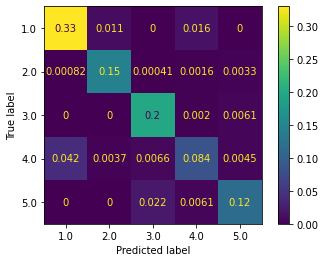

In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix

y_pred = cross_val_predict(task1_Cat, X, y, cv=10)
conf_mat2 = plot_confusion_matrix(task1_Cat, X, y_pred, normalize='all')

## Graident Bossting (GBC)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
task1_GBC = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2252, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
task1_GBC.fit(X,y)
scores = cross_val_score(task1_GBC,X,y,cv=10)
scores.mean(), scores

(0.7807377049180328,
 array([0.79098361, 0.81557377, 0.76229508, 0.78278689, 0.78278689,
        0.79918033, 0.7704918 , 0.77459016, 0.76639344, 0.76229508]))

## Gradient Boosting Confusion matrix

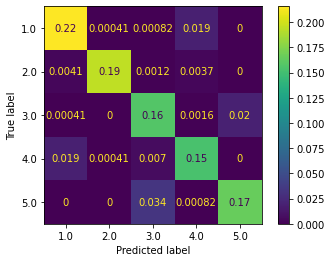

In [19]:
y_pred2 = cross_val_predict(task1_GBC, X, y, cv=10)
conf_mat2 = plot_confusion_matrix(task1_GBC, X, y_pred2, normalize='all')

Feature: 0, Score: 0.00343
Feature: 1, Score: 0.01452
Feature: 2, Score: 0.00783
Feature: 3, Score: 0.01501
Feature: 4, Score: 0.01546
Feature: 5, Score: 0.00693
Feature: 6, Score: 0.00209
Feature: 7, Score: 0.01031
Feature: 8, Score: 0.03388
Feature: 9, Score: 0.02332
Feature: 10, Score: 0.02213
Feature: 11, Score: 0.02467
Feature: 12, Score: 0.01826
Feature: 13, Score: 0.01232
Feature: 14, Score: 0.01892
Feature: 15, Score: 0.00269
Feature: 16, Score: 0.01059
Feature: 17, Score: 0.01363
Feature: 18, Score: 0.00715
Feature: 19, Score: 0.00880
Feature: 20, Score: 0.01617
Feature: 21, Score: 0.00491
Feature: 22, Score: 0.01887
Feature: 23, Score: 0.00845
Feature: 24, Score: 0.00878
Feature: 25, Score: 0.05015
Feature: 26, Score: 0.01350
Feature: 27, Score: 0.01610
Feature: 28, Score: 0.00654
Feature: 29, Score: 0.03356
Feature: 30, Score: 0.03044
Feature: 31, Score: 0.01865
Feature: 32, Score: 0.02897
Feature: 33, Score: 0.03338
Feature: 34, Score: 0.01352
Feature: 35, Score: 0.01524
Fe

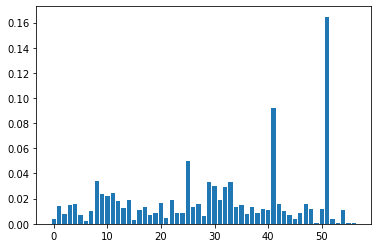

In [20]:
from sklearn.datasets import make_classification
from matplotlib import pyplot
importance = task1_RF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [23]:
feature_list = pd.concat([pd.Series(X.columns), pd.Series(task1_RF.feature_importances_)], axis=1)
feature_list.columns = ['features_name', 'importance']
feature_list.sort_values("importance", ascending =False)

,features_name,importance
51,PARKISM,0.164610
41,SLPINJUR,0.092055
25,NP2TRMR,0.050147
8,NP1SLPN,0.033885
29,ESS1,0.033564
33,ESS5,0.033380
30,ESS2,0.030435
32,ESS4,0.028969
11,NP1URIN,0.024673
9,NP1SLPD,0.023317


Feature: 0, Score: 0.00266
Feature: 1, Score: 0.00780
Feature: 2, Score: 0.00533
Feature: 3, Score: 0.00663
Feature: 4, Score: 0.01012
Feature: 5, Score: 0.00157
Feature: 6, Score: 0.00653
Feature: 7, Score: 0.01140
Feature: 8, Score: 0.02318
Feature: 9, Score: 0.01463
Feature: 10, Score: 0.00854
Feature: 11, Score: 0.01417
Feature: 12, Score: 0.01132
Feature: 13, Score: 0.01258
Feature: 14, Score: 0.01340
Feature: 15, Score: 0.00338
Feature: 16, Score: 0.01238
Feature: 17, Score: 0.00603
Feature: 18, Score: 0.00516
Feature: 19, Score: 0.01503
Feature: 20, Score: 0.01666
Feature: 21, Score: 0.00642
Feature: 22, Score: 0.01323
Feature: 23, Score: 0.00562
Feature: 24, Score: 0.01135
Feature: 25, Score: 0.11468
Feature: 26, Score: 0.01146
Feature: 27, Score: 0.02101
Feature: 28, Score: 0.01933
Feature: 29, Score: 0.02437
Feature: 30, Score: 0.01322
Feature: 31, Score: 0.01326
Feature: 32, Score: 0.00532
Feature: 33, Score: 0.01057
Feature: 34, Score: 0.00852
Feature: 35, Score: 0.00684
Fe

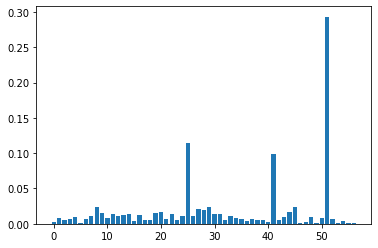

In [21]:
from xgboost import XGBClassifier
importance = task1_GBC.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [24]:
feature_list = pd.concat([pd.Series(X.columns), pd.Series(task1_GBC.feature_importances_)], axis=1)
feature_list.columns = ['features_name', 'importance']
feature_list.sort_values("importance", ascending =False)

,features_name,importance
51,PARKISM,0.293166
25,NP2TRMR,0.114684
41,SLPINJUR,0.099395
29,ESS1,0.024371
8,NP1SLPN,0.023181
45,DRMOBJFL,0.023108
27,NP2WALK,0.021009
28,NP2FREZ,0.019329
44,DRMUMV,0.016764
20,NP2DRES,0.016663
